<a href="https://colab.research.google.com/github/fynnomenon/EDA_MXMH/blob/develop/EDA_MXMH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To-Do: 
- Describe why you chose the dataset and the sort of data it contains. 
- Describe the questions you were interested in exploring and why you chose the visualizations to explore the data. 
- Further, write a report under each plot on how it should be interpreted and what you learned from it. 
- Use descriptive statistics and hypothesis testing wherever necessary. 
- Don't forget to label your axes fully! 
- Every notebook should contain a minimum of 8 plots with the corresponding text. 
- The notebook should look like a self-contained report on the dataset you worked on.

The aim of this project is to conduct an Exploratory Data Analysis (EDA) one a Kaggle Dataset related to Music & Mental Health Survey Results. We aim to inverstigate whether there are correlations between participiants favourite music genres and their mental health. The data set used here is based on self- reported music listening habits. The data is subjective to the accuracy of self-reporting, and causation of the effect of music on listeners cannot be determined from the data provided. The EDA will involwe:

*   Checking the characteristics of the data
*   Cleaning and processing the data
*   Using visualization tools to gather insights

The ultimate goal is to identify correlations between music listening habits and their effects on mental health symptoms, which could lead to contribution of more informed application of Music Therapy for mental health support and prevention.

In [ ]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving mxmh_survey_results.csv to mxmh_survey_results.csv


{'mxmh_survey_results.csv': b'Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions\r\n8/27/2022 19:29:02,18,Spotify,3,Yes,Yes,Yes,Latin,Yes,Yes,156,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,,I understand.\r\n8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,119,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,,I understand.\r\n8/27/2022

In [ ]:
# Load the dataset
df = pd.read_csv('mxmh_survey_results.csv')

# Inspection of the dataset

In [ ]:
# Inspect the first 5 rows
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
# Checking the column names
col_names = "\n".join([name for name in list(df.columns)])

# Checking the shape
print(f"The dataset contains {df.shape[0]} entries from different participants for {df.shape[1]} distinct variables. The variables are: \n{col_names}")

The dataset contains 736 entries from different participants for 33 distinct variables. The variables are: 
Timestamp
Age
Primary streaming service
Hours per day
While working
Instrumentalist
Composer
Fav genre
Exploratory
Foreign languages
BPM
Frequency [Classical]
Frequency [Country]
Frequency [EDM]
Frequency [Folk]
Frequency [Gospel]
Frequency [Hip hop]
Frequency [Jazz]
Frequency [K pop]
Frequency [Latin]
Frequency [Lofi]
Frequency [Metal]
Frequency [Pop]
Frequency [R&B]
Frequency [Rap]
Frequency [Rock]
Frequency [Video game music]
Anxiety
Depression
Insomnia
OCD
Music effects
Permissions


In [ ]:
# Identify duplicate rows
duplicates = df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", sum(duplicates))

Number of duplicate rows: 0


In [ ]:
# Identify missing values 
missing = df.isnull().sum()

# Print the missing values
print(f"Missing values: {missing}")

Missing values: Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety     

Drop null values but fill in the null values for BPM (because there are so many of them)

In [ ]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Check if everbody gave permission

In [ ]:
print(df[df["Permissions"] == "I understand."]["Permissions"].count() == df["Permissions"].count())

True


# Transformation of the dataset

## Removing outliers

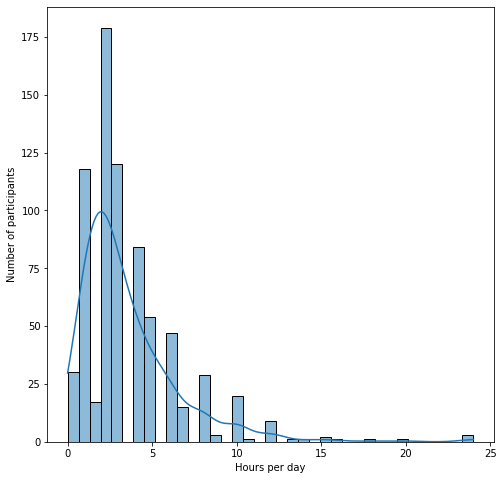

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sns.histplot(data=df, x='Hours per day', kde=True)
ax.set_ylabel('Number of participants')

plt.show()

In [ ]:
# Printing the number of participants that listen to more than 15h of music a day:
hpd_outliers = df[df["Hours per day"] > 13]
hpd_outliers_num = len(hpd_outliers)
hpd_outliers_percentage = np.round((hpd_outliers_num/df.shape[0])*100, 2)
print(f"There are {hpd_outliers_num} paricipants that listen to more than 15 hours of music per day. They make up {hpd_outliers_percentage}% of the data")

There are 9 paricipants that listen to more than 15 hours of music per day. They make up 1.22% of the data


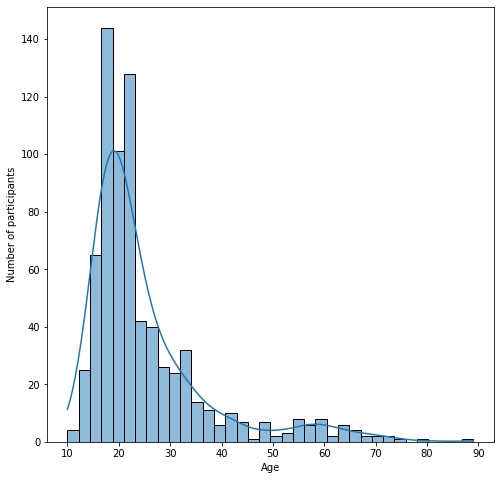

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sns.histplot(data=df, x='Age', kde=True)
ax.set_ylabel('Number of participants')

plt.show()

In [ ]:
# Printing the number of participants that are older than 60 years:
age_outliers = df[df["Age"] > 75]
age_outliers_num = len(age_outliers)
age_outliers_percentage = np.round((age_outliers_num/df.shape[0])*100, 2)
print(f"There are {age_outliers_num} paricipants that are older than 60 years. They make up {age_outliers_percentage}% of the data")

There are 2 paricipants that are older than 60 years. They make up 0.27% of the data


In [ ]:
# Look into nice graphs for bpm
#plt.figure(figsize=(15,10))

#count, division = np.histogram(np.asarray(df['BPM']))
#count

#sns.boxplot(data=df, x="Fav genre", y="BPM")

In [ ]:
# Printing the number of participants that listen to music with more than 250 BPM:
bpm_outliers = df[df['BPM'] >= 250]
bpm_outliers_num = len(bpm_outliers)
bpm_outliers_percentage = np.round((bpm_outliers_num/df.shape[0])*100, 2)
print(f"There are {bpm_outliers_num} paricipants that listen to music with more than 250 BPM. They make up {bpm_outliers_percentage}% of the data")

There are 2 paricipants that listen to music with more than 250 BPM. They make up 0.27% of the data


In [ ]:
# Get a set of all the outliers indices 
outliers_idx = set(hpd_outliers.index.tolist() + age_outliers.index.tolist() + bpm_outliers.index.tolist())
outliers_num = len(outliers_idx)
outliers_percentage = np.round((outliers_num/df.shape[0])*100, 2)
print(f"There are {outliers_num} outliers, which make up {outliers_percentage}% of the data")

# View outlier entries
df.loc[outliers_idx]

There are 12 outliers, which make up 1.63% of the data


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
290,8/29/2022 2:46:27,27.0,Spotify,20.0,Yes,No,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Sometimes,8.0,10.0,10.0,8.0,No effect,I understand.
644,9/13/2022 1:55:43,16.0,Other streaming service,4.0,Yes,No,No,EDM,Yes,Yes,...,Never,Never,Never,Sometimes,4.0,7.0,1.0,3.0,Improve,I understand.
485,9/1/2022 19:08:55,55.0,YouTube Music,15.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,3.0,0.0,No effect,I understand.
359,8/29/2022 11:02:29,16.0,Spotify,15.0,Yes,Yes,Yes,EDM,Yes,No,...,Never,Very frequently,Very frequently,Sometimes,8.0,10.0,9.0,2.0,Improve,I understand.
695,9/28/2022 17:25:48,89.0,Spotify,24.0,Yes,Yes,Yes,Rap,No,No,...,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect,I understand.
366,8/29/2022 12:32:30,16.0,Spotify,24.0,Yes,No,No,Rock,Yes,Yes,...,Rarely,Rarely,Sometimes,Rarely,5.0,1.0,9.0,1.0,Improve,I understand.
527,9/2/2022 14:09:04,80.0,I do not use a streaming service.,3.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,7.0,3.0,9.0,2.0,Improve,I understand.
18,8/27/2022 23:40:55,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve,I understand.
726,10/23/2022 20:50:27,18.0,Apple Music,18.0,Yes,No,No,EDM,Yes,No,...,Sometimes,Sometimes,Sometimes,Sometimes,9.0,8.0,5.0,10.0,Improve,I understand.
407,8/29/2022 23:20:48,26.0,Spotify,14.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,5.0,10.0,8.0,0.0,No effect,I understand.


In [ ]:
# Drop the outliers
df = df.drop(outliers_idx)

# Check if they were dropped
print(df.shape[0])

724


## Filling in missing values

In [ ]:
# Drop the entries where music effects variable is blank, because there is no way to tell how music impacted listening habits  
df = df.dropna(subset = ['Music effects'])

# Check if they were dropped
print(df.shape[0])

716


In [ ]:
# Get a list of the genres that have entries which are missing a value for the BPM column
bpm_null = df[df['BPM'].isnull() == True]
genre_bmp_null = list(bpm_null['Fav genre'].unique())
print(genre_bmp_null)

# Fill in the values for the BPM column with the mean value of the BPM of the participants' favourite genre 
for genre in genre_bmp_null:
    df['BPM'] = df['BPM'].fillna(round(df[df['Fav genre']==genre]['BPM'].mean(), 0))

['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical', 'Video game music', 'R&B', 'Folk', 'Jazz', 'Gospel', 'Rap']


<ipython-input-19-c21e14c10671>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BPM'] = df['BPM'].fillna(round(df[df['Fav genre']==genre]['BPM'].mean(), 0))


In [ ]:
# Fill the null values in all categorical columns with the mode and in all numerical columns with the mean
for col in df:
    if df[col].isnull().any():
        if df[col].dtype == 'O':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(round(df[col].mean(), 0))

# Check if there are any missing values left
missing = df.isnull().sum()
missing

<ipython-input-20-c3a7043cb241>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(round(df[col].mean(), 0))
<ipython-input-20-c3a7043cb241>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

## Cleaning the data

Remove unnecessary columns

In [ ]:
df = df.drop(columns = ["Permissions", "Timestamp"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           716 non-null    float64
 1   Primary streaming service     716 non-null    object 
 2   Hours per day                 716 non-null    float64
 3   While working                 716 non-null    object 
 4   Instrumentalist               716 non-null    object 
 5   Composer                      716 non-null    object 
 6   Fav genre                     716 non-null    object 
 7   Exploratory                   716 non-null    object 
 8   Foreign languages             716 non-null    object 
 9   BPM                           716 non-null    float64
 10  Frequency [Classical]         716 non-null    object 
 11  Frequency [Country]           716 non-null    object 
 12  Frequency [EDM]               716 non-null    object 
 13  Frequ

 Change column names for better understandibility and access

In [ ]:
df = df.rename(columns = {'Primary streaming service': 'Streaming service',
                          'Frequency [Classical]': 'Classical',
                          'Frequency [Country]': 'Country',
                          'Frequency [EDM]': 'EDM',
                          'Frequency [Folk]': 'Folk',
                          'Frequency [Gospel]': 'Gospel',
                          'Frequency [Hip hop]': 'Hip hop',
                          'Frequency [Jazz]': 'Jazz',
                          'Frequency [K pop]': 'K pop',
                          'Frequency [Latin]': 'Latin',
                          'Frequency [Lofi]': 'Lofi',
                          'Frequency [Metal]': 'Metal',
                          'Frequency [Pop]': 'Pop',
                          'Frequency [R&B]': 'R&B',
                          'Frequency [Rap]': 'Rap',
                          'Frequency [Rock]': 'Rock',
                          'Frequency [Video game music]': 'Game music'})


Change column values for ease of use

In [ ]:
print(df["Streaming service"].unique())

['Spotify' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' 'Pandora']


In [ ]:
df["Streaming service"] = df["Streaming service"].replace({'I do not use a streaming service.': 'None',
                                                    'Other streaming service': 'Other'})

print(df["Streaming service"].unique())

['Spotify' 'YouTube Music' 'None' 'Apple Music' 'Other' 'Pandora']


Round values for the mental health columns




In [ ]:
df[['Anxiety', 'Depression', 'Insomnia', 'OCD']] = df[['Anxiety', 'Depression', 'Insomnia', 'OCD']].round(0)

# Data exploration

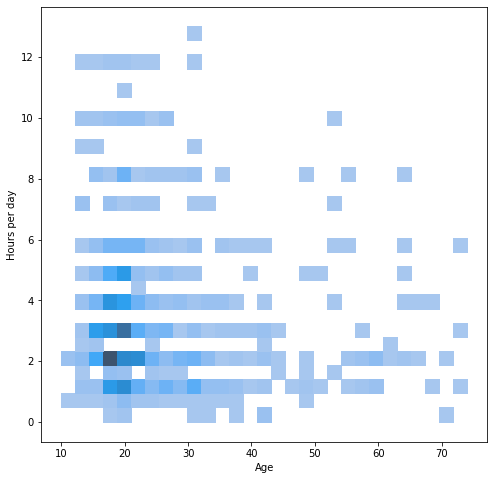

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=df, y='Hours per day', x="Age")
# figure out legend
# make this a heatmap?
plt.show()

In [ ]:
# What is the distribution of mental health disorders?

# Translate to matplotlib
# ggplot(data=music_pivot, aes(x=Score, fill=Mental_illness)) +
#   geom_bar()+
#   facet_wrap(~Mental_illness)+
#   theme(strip.text.x = element_text(size = 15),
#        legend.title=element_text(size=15), 
#        legend.text=element_text(size=14))+
#   xlab('Severity Scale')+
#   ylab('Number of Participants')+
#   labs(title='Participants Mental Health Distribution')

# ggplot(df, aes(x='Fav genre', y='Hours per day')) + geom_point()+ theme(axis_text_x = element_text(angle=90, hjust=1))
# Translate to matplotlib

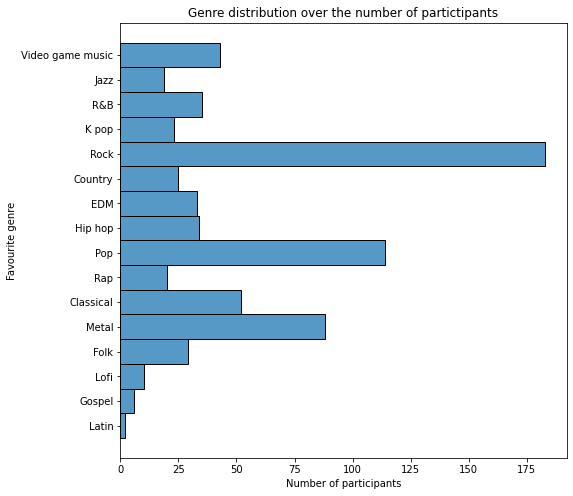

In [ ]:
# Genre distribution

fig, ax = plt.subplots(figsize=(8,8))

sns.histplot(data=df, y='Fav genre', palette='bright', binwidth=3)
#plt.xticks(rotation=90)
ax.set_xlabel('Number of participants')
ax.set_ylabel('Favourite genre')
ax.set_title('Genre distribution over the number of partictipants')

# Create space between boxes
# change color palette
# Make the top3 another colour?

plt.show()

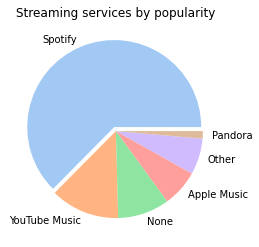

In [ ]:
# Streaming platform

services = df['Streaming service'].value_counts()
services.plot(kind='pie', 
              explode=[0.05, 0, 0, 0, 0, 0],
              colors = sns.color_palette('pastel')[0:6])

plt.title('Streaming services by popularity')
plt.ylabel("")

plt.show()

# make it more ashima like

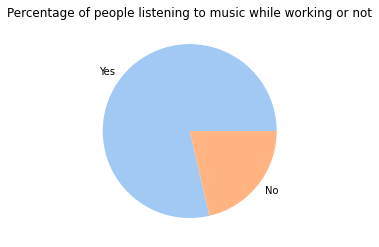

In [ ]:
# Listening while working or not

while_working = df['While working'].value_counts()
while_working.plot(kind='pie', 
                   colors = sns.color_palette('pastel')[0:2])

plt.title('Percentage of people listening to music while working or not')
plt.ylabel("")

plt.show()

In [ ]:
# Measuring correlation between two variables


# Check different variables (more related to the research question)
df_=df[['Anxiety','Insomnia','Depression','OCD','Age','Hours per day']]
df_corr = df[['Anxiety','Insomnia','Depression','OCD','Age','Hours per day']].corr()
round(df_corr,2)

,Anxiety,Insomnia,Depression,OCD,Age,Hours per day
Anxiety,1.00,0.29,0.52,0.34,-0.17,0.08
Insomnia,0.29,1.00,0.37,0.22,0.01,0.14
Depression,0.52,0.37,1.00,0.19,-0.10,0.14
OCD,0.34,0.22,0.19,1.00,-0.12,0.13
Age,-0.17,0.01,-0.10,-0.12,1.00,-0.10
Hours per day,0.08,0.14,0.14,0.13,-0.10,1.00


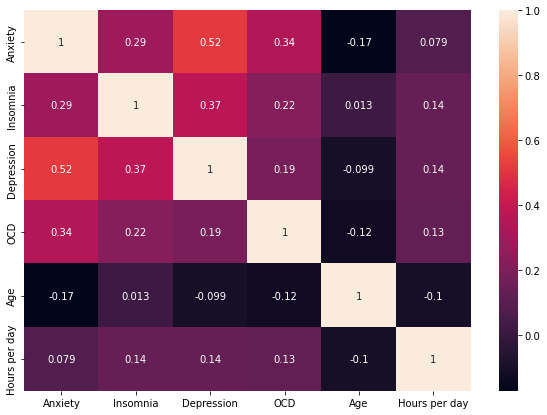

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df_corr, annot=True)

A correlation coefficient (typically denoted r) is a single number that describes the extent of the linear relationship between two variables. A value of +1 indicates perfect linearity (the two variables move together). A value of r = 0 indicates no correlation (the variables are independent) and r = -1 indicates the variables are inversely correlated (an increase in one variable is associated with a decrease in the other).

High correlations are indicated by values of ±0.6 to ± 1

Discription:

Anxiety:

The level of anxiety is positively correlated with the amount of time spent listening per day.
As age increases among participants, there is a negative correlation with anxiety, meaning that anxiety tends to decrease.
Among this group of people, anxiety and depression exhibit a strong correlation in comparison to other variables.
Insomnia:

The level of insomnia is positively correlated with the amount of time spent listening per day.
As age increases among participants, there is a positive correlation with anxiety, meaning that anxiety tends to increased.
Among this group of people, insomnia exhibits a strong correlation in comparison to other variables with OCD and depression.
Depression:

The level of depression is positively correlated with the amount of time spent listening per day.
As age increases among participants, there is a negative correlation with depression, meaning that depression tends to decrease.
Among this group of people, depression exhibits a strong correlation in comparison to other variables with anxiety and insomnia.
OCD:

The level of OCD is positively correlated with the amount of time spent listening per day.
As age increases among participants, there is a negative correlation with OCD, meaning that depression tends to decrease.
Among this group of people, OCD exhibits a strong correlation in comparison to other variables with anxiety and insomnia.

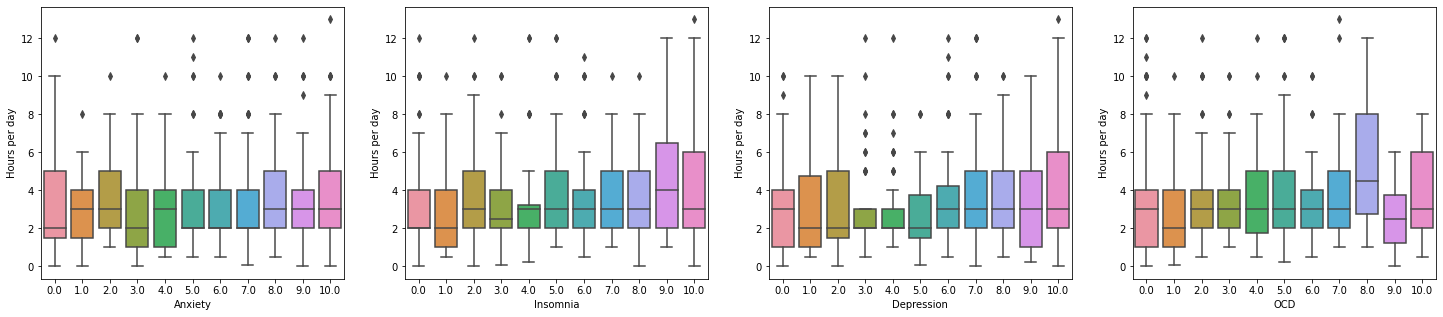

In [ ]:
plt.figure(figsize=(25,5 ))
plt.subplot (1,4,1)
sns.boxplot(x=df['Anxiety'], y=df['Hours per day'])
plt.subplot (1,4,2)
sns.boxplot(x=df['Insomnia'], y=df['Hours per day'])
plt.subplot (1,4,3)
sns.boxplot(x=df['Depression'], y=df['Hours per day'])
plt.subplot (1,4,4)
sns.boxplot(x=df['OCD'], y=df['Hours per day'])

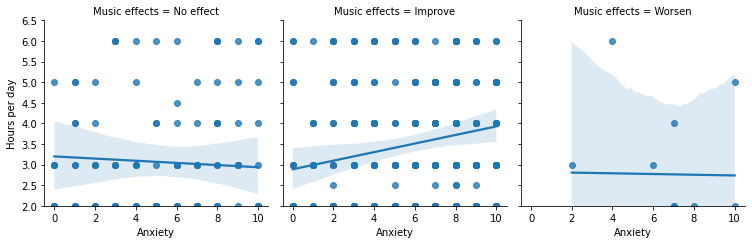

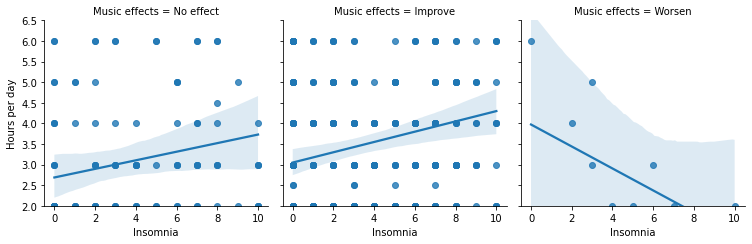

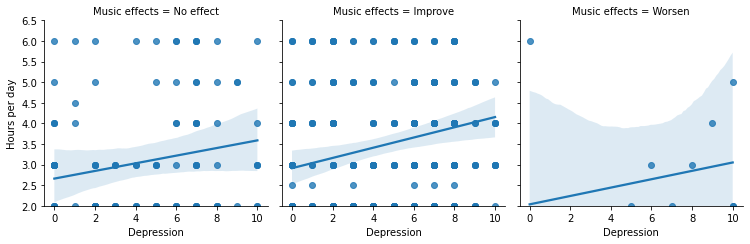

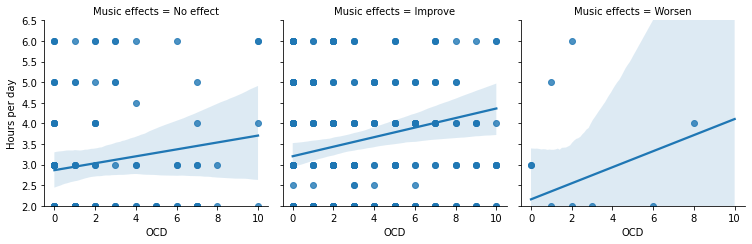

In [ ]:
#specifying the regression model

fig = sns.lmplot(x ='Anxiety', y ='Hours per day', data = df, height=3.5, col= 'Music effects') # Height (in inches) of each facet.
fig.set(ylim=(2, 6.5))
fig = sns.lmplot(x ='Insomnia', y ='Hours per day', data = df, height=3.5, col= 'Music effects')
fig.set(ylim=(2, 6.5))
fig = sns.lmplot(x ='Depression', y ='Hours per day', data = df, height=3.5, col= 'Music effects')
fig.set(ylim=(2, 6.5))
fig = sns.lmplot(x ='OCD', y ='Hours per day', data = df, height=3.5, col= 'Music effects')
fig.set(ylim=(2, 6.5))
